In [1]:
##Clear the environment
rm(list=ls())

##Turn off scientific notations for numbers
options(scipen = 999)  

##Set locale
Sys.setlocale("LC_ALL", "English") 

##Set seed for reproducibility
set.seed(2345)

# Turn off warnings
options(warn = -1)

getstats <- function(cm){
  # Sensititvity a.k.a TPR
  tpr <-cm[2,2]/(cm[2,2]+cm[2,1])
  fpr <-cm[1,2]/(cm[1,2]+cm[1,1])
  
  # Specificity a.k.a. TNR
  tnr <- cm[1,1]/(cm[1,1]+cm[1,2])
  fnr <- cm[2,1]/(cm[2,1]+cm[2,2])
  
  # Calculate accuracy
  acc <-(cm[2,2]+cm[1,1])/sum(cm)
  err <-(cm[1,2]+cm[2,1])/sum(cm)
  
  #Precision - Positive Predictive Value
  ppv <- cm[2,2]/(cm[2,2]+cm[1,2])
  
  # Negative Predictive Value
  npv <- cm[1,1]/(cm[1,1]+cm[2,1])
  
  rbind(TruePos_Sensitivity=tpr, FalsePos=fpr, TrueNeg_Specificty=tnr, FalseNeg=fnr, PositivePredictiveValue=ppv, NegativePredictiveValue=npv, Accuracy = acc, Error = err)
}

# clean the data names and data
# Use: df<-cleanit(df)
cleanit <-function(df){
  names(df) <-tolower(names(df))
  names(df) <- gsub("\\(","",names(df))
  names(df) <- gsub("\\)","",names(df))
  names(df) <- gsub("\\.","",names(df))
  names(df) <- gsub("_","",names(df))
  names(df) <- gsub("-","",names(df))
  names(df) <- gsub(",","",names(df))
  return(df)
}


[1] "LC_COLLATE=English_United States.1252;LC_CTYPE=English_United States.1252;LC_MONETARY=English_United States.1252;LC_NUMERIC=C;LC_TIME=English_United States.1252"

Beginning in October, 2015, Powerball® became an even larger combined large jackpot game and cash game. Every Wednesday and Saturday night at 10:59 p.m. Eastern Time, we draw five white balls out of a drum with 69 balls and one red ball out of a drum with 26 red balls. This change means bigger jackpots. It also means that your odds of winning some prize are improved.

The jackpot - won by matching all five white balls in any order and the red Powerball - is either an annuitized prize paid out over 29 years (30 payments counting the first immediate payment) or a cash lump sum payment. If you choose the cash, then you get the cash, pay the tax, and can invest what is left over. If you choose the annuity, then we can invest the cash amount pre-tax, less an immediate first payment (more to invest means more earnings). With the annuity, you get an annual payment that is increased by 5% each year to keep up with the cost of living.

The second prize - won by matching five white balls in any order - is $1,000,000 paid in cash (no annuity option). You win by matching at least three white ball numbmers. Any time you match the red Powerball, you win a prize. The overall odds of winning a prize in the game are approximately 1 in 25. Players win a prize by matching one of the 9 Ways to Win.

Each ticket costs $2. Draw sales cut off at least 59 minutes before the draw, but a state may cut off sales earlier. Check with your state lottery for your cut-off time.

To win the grand prize, the ticket must match all five numbers (in any order) and the red Powerball number.

10/07/15  Game Change - Powerball 5/69 + 1/26	
5/69 + 1/26 matrix, jackpots start at $40 Million; Match 4 + PB now $50,000; Power Play 10X possible in draws for jackpots up to $150 Million; Still $2 per play; $1 extra for Power Play

01/18/12 Game Change - Powerball 5/59 + 1/35
5/59 + 1/35 matrix, jackpots start at $40 Million; Match 5 prize now $1 Million cash; Power Play prizes set dollar values; new price point $2 per play; $1 extra for Power Play

01/07/09 Game Change - Powerball 5/59 + 1/39
5/59 + 1/39 matrix, jackpots start at $20 Million; Power Play now selected using an RNG

08/31/05 Game Change - Powerball 5/55 + 1/42
5/55 + 1/42 matrix, jackpots start at $15 Million; Power Play wheel changed to 16 slots (2, 3, 4, 5 - four of each number)

10/09/02  Game Change - Powerball 5/53 + 1/42
5/53 + 1/42 matrix, jackpots start at $10 Million; Power Play wheel changed to 15 slots (3-2's; 3-3's; 3-4's; 6-5's)


11/05/97  Game Change - Powerball 5/49 + 1/42	
5/49 + 1/42 matrix, jackpots start at $10 Million

04/22/92 New Game - Powerball 5/45 + 1/45	
5/45 + 1/45 matrix, jackpots start at $2 Million

In [2]:
# Choose
#fname <- file.choose()
df<- read.delim("http://www.powerball.com/powerball/winnums-text.txt",sep = "",skip=1,header=FALSE)

In [3]:
summary(df)

          V1             V2              V3              V4       
 01/01/2000:   1   Min.   : 1.00   Min.   : 1.00   Min.   : 1.00  
 01/01/2003:   1   1st Qu.:15.00   1st Qu.:13.00   1st Qu.:14.00  
 01/01/2005:   1   Median :28.00   Median :26.00   Median :28.00  
 01/01/2011:   1   Mean   :28.33   Mean   :27.16   Mean   :28.22  
 01/01/2014:   1   3rd Qu.:41.00   3rd Qu.:41.00   3rd Qu.:42.00  
 01/02/1999:   1   Max.   :67.00   Max.   :68.00   Max.   :69.00  
 (Other)   :1916                                                  
       V5              V6              V7              V8        
 Min.   : 1.00   Min.   : 1.00   Min.   : 1.00   Min.   : 1.000  
 1st Qu.:15.00   1st Qu.:14.25   1st Qu.:10.00   1st Qu.: 2.000  
 Median :28.00   Median :29.00   Median :20.00   Median : 3.000  
 Mean   :28.12   Mean   :28.29   Mean   :20.02   Mean   : 3.434  
 3rd Qu.:41.00   3rd Qu.:41.00   3rd Qu.:30.00   3rd Qu.: 5.000  
 Max.   :69.00   Max.   :69.00   Max.   :42.00   Max.   :10.000  
  

In [4]:
# count blanks remove blanks
#barplot(colSums(!is.na(df)))
colSums(!is.na(df)) ## Count blanks
#df <- na.omit(df) ## THis will remove blanks

V1   V2   V3   V4   V5   V6   V7   V8 
1922 1922 1922 1922 1922 1922 1922 1363

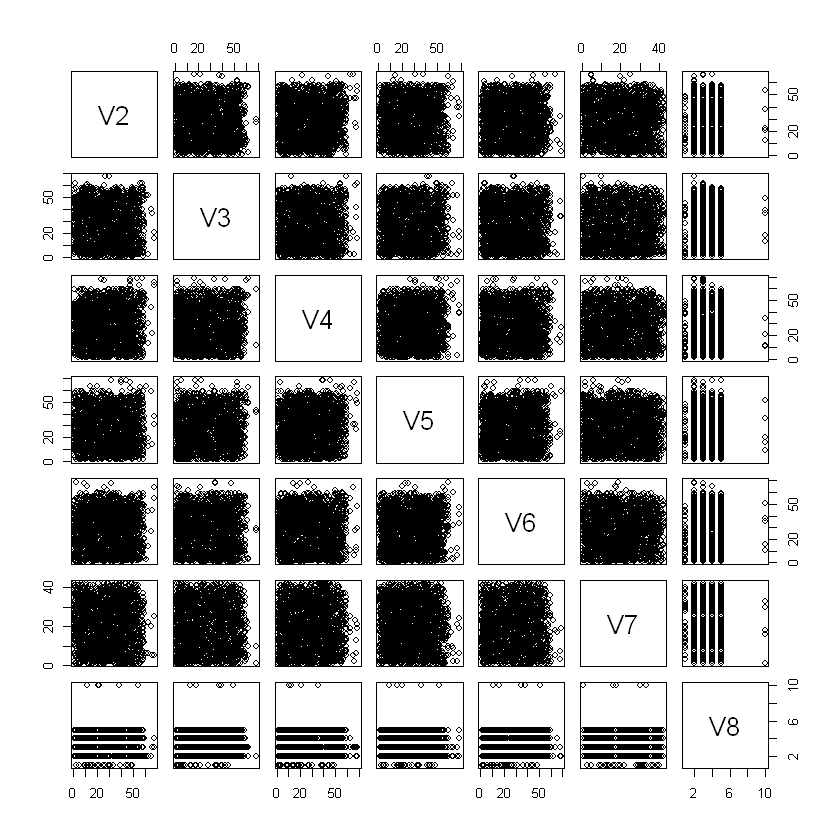

In [5]:
plot(df[,-1])

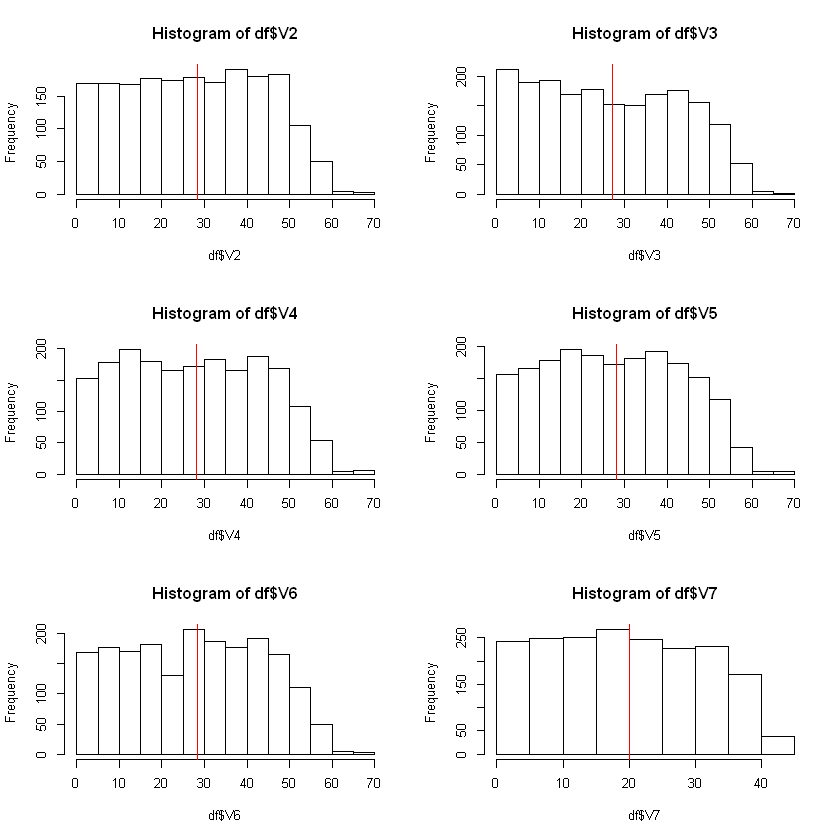

In [6]:
par(mfrow=c(3,2))
hist(df$V2)
abline(v=mean(df$V2),col="red")
hist(df$V3)
abline(v=mean(df$V3),col="red")
hist(df$V4)
abline(v=mean(df$V4),col="red")
hist(df$V5)
abline(v=mean(df$V5),col="red")
hist(df$V6)
abline(v=mean(df$V6),col="red")
hist(df$V7)
abline(v=mean(df$V7),col="red")

In [7]:
n1<-head(sort(table(df$V2),decreasing=TRUE))
n2<-head(sort(table(df$V3),decreasing=TRUE))
n3<-head(sort(table(df$V4),decreasing=TRUE))
n4<-head(sort(table(df$V5),decreasing=TRUE))
n5<-head(sort(table(df$V6),decreasing=TRUE))
n6<-head(sort(table(df$V7),decreasing=TRUE))

In [8]:
c(n1[1],n2[1],n3[1],n4[1],n5[2],n6[1])
c(n1[2],n2[2],n3[2],n4[2],n5[1],n6[2])
c(n1[3],n2[3],n3[3],n4[3],n5[3],n6[3])
c(n1[5],n2[4],n3[4],n4[4],n5[4],n6[4])
c(n1[4],n2[5],n3[5],n4[5],n5[5],n6[5])

40  5 32 16 41 20 
46 48 46 47 48 65

41  2 19 34 26  6 
46 47 45 47 52 61

17 15 42 20 30  2 
45 47 45 46 45 60

12 22 13 40 32 18 
43 44 44 45 45 56

22  4 14 38  3 23 
44 43 44 43 43 56

In [9]:
sort(table(df$V3))

61 60 68 62 59 57 58 55 56 29 31 54 53 51 17 48 27 46 50 38 21 41 19 35  3 23 
 1  2  2  3 11 13 13 14 14 22 22 22 24 25 26 26 27 27 27 28 29 29 30 30 31 31 
32 40 30  6 12 33 44 52 26 37 45 47  9 16 25 34  8 13 14 28 18 36 39 11 24 42 
31 31 32 33 33 33 33 33 34 34 34 34 35 35 35 35 37 37 37 37 38 38 38 39 39 39 
20 43 49  1 10  4  7 22  2 15  5 
41 41 41 42 42 43 43 44 47 47 48

In [10]:
df

,V1,V2,V3,V4,V5,V6,V7,V8
1,03/30/2016,55,24,63,53,44,19,2
2,03/26/2016,23,42,68,52,11,6,3
3,03/23/2016,22,15,49,5,8,25,3
4,03/19/2016,11,60,23,54,43,3,3
5,03/16/2016,46,50,12,13,10,21,3
6,03/12/2016,28,11,50,57,62,23,2
7,03/09/2016,32,34,14,23,68,3,3
8,03/05/2016,3,34,27,59,69,19,2
9,03/02/2016,62,52,13,12,44,6,2
10,02/27/2016,22,11,53,21,10,18,3


In [11]:
sort(table(df$V2))

61 65 66 62 67 59 56 51 57 58 54 53 55 21 50 52  1 33 11 13 25  3 15 34 36 43 
 1  1  1  2  2  7 12 13 13 18 19 22 24 25 26 27 28 28 29 29 29 30 30 30 30 30 
 6 18 20  4  9 19 10 28 29 42  8 35 30 44 23 39 45  2 14 27 38 16 47 48 32  7 
31 31 31 32 32 32 33 33 33 33 34 34 35 35 36 36 36 37 37 37 37 38 38 38 39 40 
24 26 31 49 37 46  5 12 22 17 40 41 
40 40 40 40 41 41 42 43 44 45 46 46